In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

# Análise dos dados de treino do Motor1

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #importando o seaborn
import matplotlib.pyplot as plt
import math

In [3]:
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

In [4]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21"]

#Lê os dados, adiciona a coluna RUL e remove as colunas cycle, op1, op2 e op3
def load_data (clean=True):
    data = pd.read_csv("../input/nasa-cmaps/CMaps/train_FD001.txt", sep= "\s+", header = None,names=columns )
    data = data.groupby('id').apply(add_rul)
    if clean==True:
        data = data.drop(["cycle","op1","op2","op3"], axis=1)
    return data  

In [5]:
def corr_clean (data):
    for col in columns[5:]:
        if math.isnan(data.corr()['RUL'][col]):
            data = data.drop([col], axis=1)
    data = data.corr()
    return data

In [6]:
train_data = load_data()
train_data.head()

,id,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   sensor1   20631 non-null  float64
 2   sensor2   20631 non-null  float64
 3   sensor3   20631 non-null  float64
 4   sensor4   20631 non-null  float64
 5   sensor5   20631 non-null  float64
 6   sensor6   20631 non-null  float64
 7   sensor7   20631 non-null  float64
 8   sensor8   20631 non-null  float64
 9   sensor9   20631 non-null  float64
 10  sensor10  20631 non-null  float64
 11  sensor11  20631 non-null  float64
 12  sensor12  20631 non-null  float64
 13  sensor13  20631 non-null  float64
 14  sensor14  20631 non-null  float64
 15  sensor15  20631 non-null  float64
 16  sensor16  20631 non-null  float64
 17  sensor17  20631 non-null  int64  
 18  sensor18  20631 non-null  int64  
 19  sensor19  20631 non-null  float64
 20  sensor20  20631 non-null  fl

In [8]:
train_data.std()

id          2.922763e+01
sensor1     0.000000e+00
sensor2     5.000533e-01
sensor3     6.131150e+00
sensor4     9.000605e+00
sensor5     1.776400e-15
sensor6     1.388985e-03
sensor7     8.850923e-01
sensor8     7.098548e-02
sensor9     2.208288e+01
sensor10    0.000000e+00
sensor11    2.670874e-01
sensor12    7.375534e-01
sensor13    7.191892e-02
sensor14    1.907618e+01
sensor15    3.750504e-02
sensor16    1.387812e-17
sensor17    1.548763e+00
sensor18    0.000000e+00
sensor19    0.000000e+00
sensor20    1.807464e-01
sensor21    1.082509e-01
RUL         6.888099e+01
dtype: float64

## Limpeza dos dados

### Verificando sensores com valores de correlação NaN

In [9]:
print (train_data.corr()['RUL'])

id          0.078753
sensor1          NaN
sensor2    -0.606484
sensor3    -0.584520
sensor4    -0.678948
sensor5          NaN
sensor6    -0.128348
sensor7     0.657223
sensor8    -0.563968
sensor9    -0.390102
sensor10         NaN
sensor11   -0.696228
sensor12    0.671983
sensor13   -0.562569
sensor14   -0.306769
sensor15   -0.642667
sensor16         NaN
sensor17   -0.606154
sensor18         NaN
sensor19         NaN
sensor20    0.629428
sensor21    0.635662
RUL         1.000000
Name: RUL, dtype: float64


In [10]:
data_cor = corr_clean (train_data)

## Analisando a correlação

<AxesSubplot:>

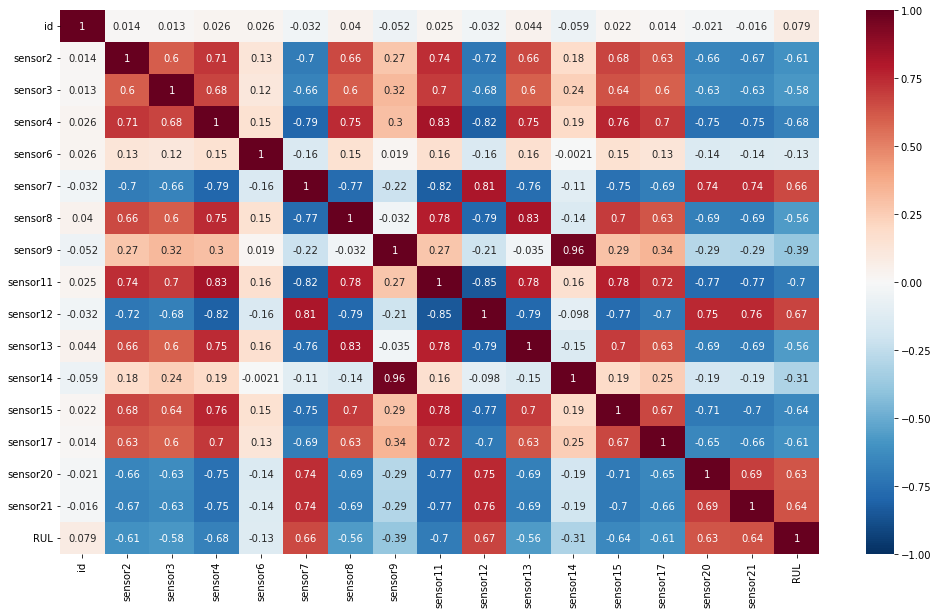

In [11]:
plt.figure(figsize=(17,10))
sns.heatmap(data_cor, cmap='RdBu_r', vmin=-1, vmax=1, annot=True)

In [12]:
data_cor.sort_values(by=['RUL'], ascending=False, key=abs).head(6)

,id,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL
RUL,0.078753,-0.606484,-0.584520,-0.678948,-0.128348,0.657223,-0.563968,-0.390102,-0.696228,0.671983,-0.562569,-0.306769,-0.642667,-0.606154,0.629428,0.635662,1.000000
sensor11,0.024707,0.740020,0.695900,0.830136,0.160014,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554,-0.696228
sensor4,0.026116,0.714949,0.678413,1.000000,0.150480,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193,-0.678948
sensor12,-0.031882,-0.724578,-0.680307,-0.815591,-0.155884,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263,0.671983
sensor7,-0.032073,-0.702136,-0.664595,-0.793130,-0.155720,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447,0.657223
sensor15,0.022486,0.675975,0.639921,0.758459,0.149042,-0.747051,0.700949,0.293753,0.780913,-0.766052,0.697662,0.193761,1.000000,0.669205,-0.707671,-0.704043,-0.642667


## Cálculo da Média Móvel